In [1]:
%matplotlib inline
from astropy.table import unique
import astroquery.nasa_exoplanet_archive as exoplanet
import astropy.units as u
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

Explore statistics of systems of tightly-packed inner planets (STIPs).<br>

STIPs are defined by the following criteria:
<ul> 
    <li>Three or more planets</li>
    <li>Orbital period < 100 days</li>
    <li>$R_{p} < 10 R_{\bigoplus}$</li>
</ul>

In [2]:
df = exoplanet.NasaExoplanetArchive.get_confirmed_planets_table()

In [11]:
mask = (df['pl_orbper'] < 100*u.day) & (df['pl_pnum'] >= 3) &\
         (df['pl_radj'] <= (10*u.Rearth).to(u.Rjup))
df1 = df[mask]
df_host = unique(df1, keys='pl_hostname')
print(str(len(df1)) + ' STIP planets')
stip_star_names = np.unique(df[mask]['pl_hostname'])
print(str(len(df_host)) + ' STIP systems')

710 STIP planets
221 STIP systems


Text(0, 0.5, 'Number of Systems')

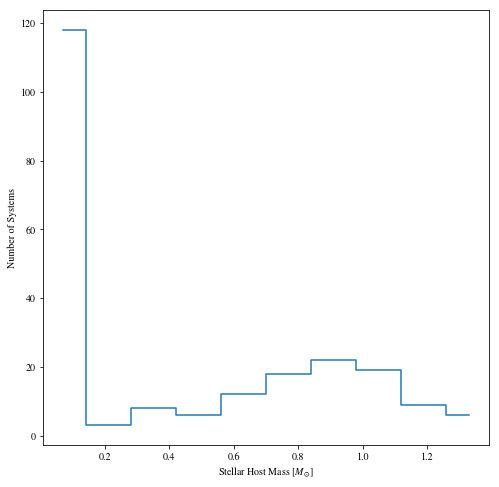

In [12]:
mass = df_host['st_mass']

fig, axes = plt.subplots(figsize=(8,8))
hist, bins = np.histogram(mass)
bins = 0.5*(bins[1:] + bins[:-1])
axes.plot(bins, hist, linestyle='steps-mid')
axes.set_xlabel(r'Stellar Host Mass [$M_{\odot}$]')
axes.set_ylabel('Number of Systems')

In [37]:
mask = (df['pl_orbper'] < 100*u.day) & (df['pl_pnum'] >= 3) &\
         (df['pl_radj'] <= (10*u.Rearth).to(u.Rjup)) & (df['st_teff'] < (3500*u.K)) & (df['st_teff'] > (0*u.K))
df1 = df[mask]
df_host = unique(df1, keys='pl_hostname')
print(str(len(df1)) + ' STIP planets')
stip_star_names = np.unique(df[mask]['pl_hostname'])
print(str(len(df_host)) + ' STIP systems')

38 STIP planets
11 STIP systems


In [38]:
stip_star_names

GJ 3293
GJ 667 C
K2-239
K2-72
Kepler-42
Kepler-445
Kepler-446
L 98-59
TRAPPIST-1
Wolf 1061
YZ Cet
